<a href="https://colab.research.google.com/github/sankeerthana2511/sankeerthana/blob/main/700757550_ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Keras_Example_Fall.ipynb to Keras_Example_Fall.ipynb


In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np

In [5]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Define the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8749 - loss: 0.4128 - val_accuracy: 0.9605 - val_loss: 0.1317
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9667 - loss: 0.1083 - val_accuracy: 0.9684 - val_loss: 0.1028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9788 - loss: 0.0678 - val_accuracy: 0.9713 - val_loss: 0.0959
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9838 - loss: 0.0505 - val_accuracy: 0.9749 - val_loss: 0.0853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9751 - val_loss: 0.0882


In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Baseline model accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1082
Baseline model accuracy: 0.9751


In [8]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8733 - loss: 0.4044 - val_accuracy: 0.9623 - val_loss: 0.1261
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9703 - loss: 0.0987 - val_accuracy: 0.9673 - val_loss: 0.1092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9795 - loss: 0.0695 - val_accuracy: 0.9728 - val_loss: 0.1042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9834 - loss: 0.0553 - val_accuracy: 0.9716 - val_loss: 0.1076
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9870 - loss: 0.0464 - val_accuracy: 0.9809 - val_loss: 0.0784


In [9]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(x_test, y_test)
print(f"Complex model accuracy: {complex_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0878
Complex model accuracy: 0.9809


Compare Results:
Comparing the accuracies of the baseline and complex models. In general, adding more layers can help the model learn more complex patterns, but it can also lead to overfitting if not handled properly.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Keras_Example_Fall.ipynb to Keras_Example_Fall (1).ipynb


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7716 - loss: 0.5565 - val_accuracy: 0.9825 - val_loss: 0.3171
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9504 - loss: 0.2847 - val_accuracy: 0.9737 - val_loss: 0.1735
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9523 - loss: 0.1765 - val_accuracy: 0.9737 - val_loss: 0.1170
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9512 - loss: 0.1468 - val_accuracy: 0.9649 - val_loss: 0.0948
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9662 - loss: 0.1093 - val_accuracy: 0.9649 - val_loss: 0.0828
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9762 - loss: 0.0946 - val_accuracy: 0.9649 - val_loss: 0.0771
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9858 - loss: 0.0808 - val_accuracy: 0.9649 - val_loss: 0.0753
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9904 - loss: 0.0638 - val_accuracy: 0.9649 - va

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Basic model accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.0730 
Basic model accuracy: 0.9649


In [18]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6975 - loss: 0.6228 - val_accuracy: 0.9561 - val_loss: 0.3274
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.2578 - val_accuracy: 0.9737 - val_loss: 0.0979
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9591 - loss: 0.1275 - val_accuracy: 0.9825 - val_loss: 0.0571
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9685 - loss: 0.0861 - val_accuracy: 0.9825 - val_loss: 0.0533
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9871 - loss: 0.0400 - val_accuracy: 0.9737 - val_loss: 0.0511
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9851 - loss: 0.0395 - val_accuracy: 0.9737 - val_loss: 0.0581
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9858 - loss: 0.0487 - val_accuracy: 0.9737 - val_loss: 0.0576
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0232 - val_accuracy: 0.9737 - val_lo

In [19]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(X_test, y_test)
print(f"Complex model accuracy: {complex_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9738 - loss: 0.0829 
Complex model accuracy: 0.9737


Typically, a more complex model might provide better performance on training data but could overfit.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5247 - loss: 0.6867 - val_accuracy: 0.9123 - val_loss: 0.4338
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9317 - loss: 0.3886 - val_accuracy: 0.9649 - val_loss: 0.2529
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9681 - loss: 0.2132 - val_accuracy: 0.9737 - val_loss: 0.1531
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9714 - loss: 0.1369 - val_accuracy: 0.9737 - val_loss: 0.1087
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.1181 - val_accuracy: 0.9737 - val_loss: 0.0888
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0860 - val_accuracy: 0.9737 - val_loss: 0.0775
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0787 - val_accuracy: 0.9737 - val_loss: 0.0715
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9823 - loss: 0.0671 - val_accuracy: 0.9737 - val_loss: 0.0687
Ep

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Basic model accuracy with normalized data: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.0742 
Basic model accuracy with normalized data: 0.9825


In [24]:
# Define a more complex model
def create_complex_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the more complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6498 - loss: 0.6520 - val_accuracy: 0.9561 - val_loss: 0.4795
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9245 - loss: 0.4076 - val_accuracy: 0.9649 - val_loss: 0.1797
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.1860 - val_accuracy: 0.9737 - val_loss: 0.0764
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0833 - val_accuracy: 0.9561 - val_loss: 0.0735
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0839 - val_accuracy: 0.9737 - val_loss: 0.0681
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9748 - loss: 0.0740 - val_accuracy: 0.9649 - val_loss: 0.0690
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0468 - val_accuracy: 0.9825 - val_loss: 0.0696
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9960 - loss: 0.0261 - val_accuracy: 0.9737 - val_los

In [25]:
# Evaluate the complex model
complex_loss, complex_accuracy = complex_model.evaluate(X_test, y_test)
print(f"Complex model accuracy with normalized data: {complex_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9558 - loss: 0.1240
Complex model accuracy with normalized data: 0.9649


Normalization can often lead to improved performance, as it ensures that all features contribute equally to the learning process, especially when they are on different scales.Normalization generally helps in speeding up convergence and achieving better performance, but the exact impact can vary depending on the dataset and model.

Question 2:

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [27]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [28]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8835 - loss: 0.4087 - val_accuracy: 0.9614 - val_loss: 0.1309
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9671 - loss: 0.1057 - val_accuracy: 0.9682 - val_loss: 0.1000
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9788 - loss: 0.0703 - val_accuracy: 0.9723 - val_loss: 0.0927
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9730 - val_loss: 0.0873
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.9746 - val_loss: 0.0829
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9900 - loss: 0.0300 - val_accuracy: 0.9754 - val_loss: 0.0867
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0306 - val_accuracy: 0.9783 - val_loss: 0.0801
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9915 - loss: 0.0

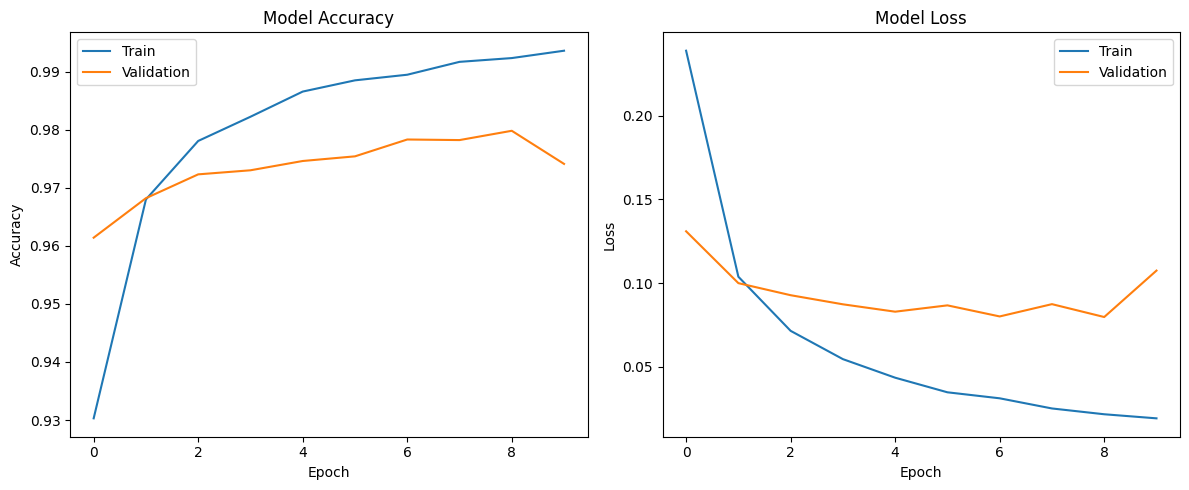

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.


In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [31]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8785 - loss: 0.4192 - val_accuracy: 0.9654 - val_loss: 0.1106
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9697 - loss: 0.1018 - val_accuracy: 0.9671 - val_loss: 0.1068
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9772 - loss: 0.0695 - val_accuracy: 0.9775 - val_loss: 0.0748
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9776 - val_loss: 0.0755
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9875 - loss: 0.0380 - val_accuracy: 0.9774 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9783 - val_loss: 0.0766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9735 - val_loss: 0.0948
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.021

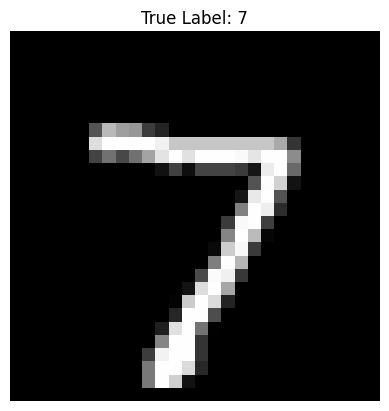

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Label: 7


In [33]:
# Select an image from the test set
index = 0  # Change this index to test different images
test_image = x_test[index]
test_label = y_test[index]

# Plot the image
plt.imshow(test_image, cmap='gray')
plt.title(f'True Label: {np.argmax(test_label)}')
plt.axis('off')
plt.show()

# Reshape the image for the model
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Perform inference
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])

print(f'Predicted Label: {predicted_class}')

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [35]:
def create_model_with_activation(activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_func),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model_with_different_layers(activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation=activation_func),
        Dense(128, activation=activation_func),
        Dense(64, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [36]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Training model with activation function: tanh
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8780 - loss: 0.4165 - val_accuracy: 0.9580 - val_loss: 0.1443
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9611 - loss: 0.1293 - val_accuracy: 0.9628 - val_loss: 0.1201
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9742 - loss: 0.0860 - val_accuracy: 0.9723 - val_loss: 0.0912
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.0609 - val_accuracy: 0.9721 - val_loss: 0.0900
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9746 - val_loss: 0.0851
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0336 - val_accuracy: 0.9734 - val_loss: 0.0882
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9759 - val_loss: 0.0873
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 

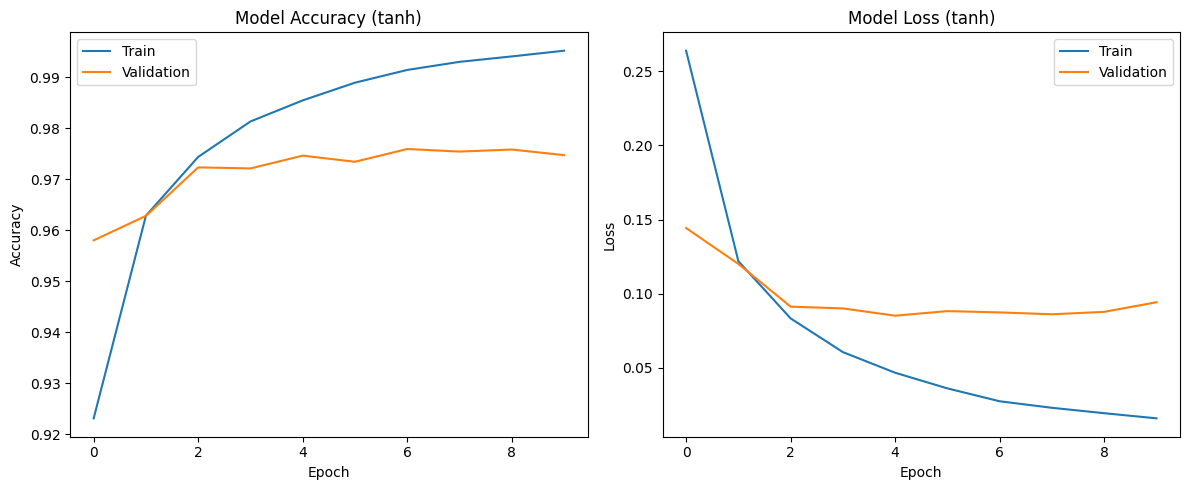

Training model with activation function: sigmoid
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7879 - loss: 0.8577 - val_accuracy: 0.9382 - val_loss: 0.2157
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9431 - loss: 0.1946 - val_accuracy: 0.9560 - val_loss: 0.1453
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9629 - loss: 0.1274 - val_accuracy: 0.9644 - val_loss: 0.1139
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9723 - loss: 0.0932 - val_accuracy: 0.9705 - val_loss: 0.0955
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9794 - loss: 0.0711 - val_accuracy: 0.9730 - val_loss: 0.0856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9844 - loss: 0.0532 - val_accuracy: 0.9751 - val_loss: 0.0813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0429 - val_accuracy: 0.9770 - val_loss: 0.0768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━

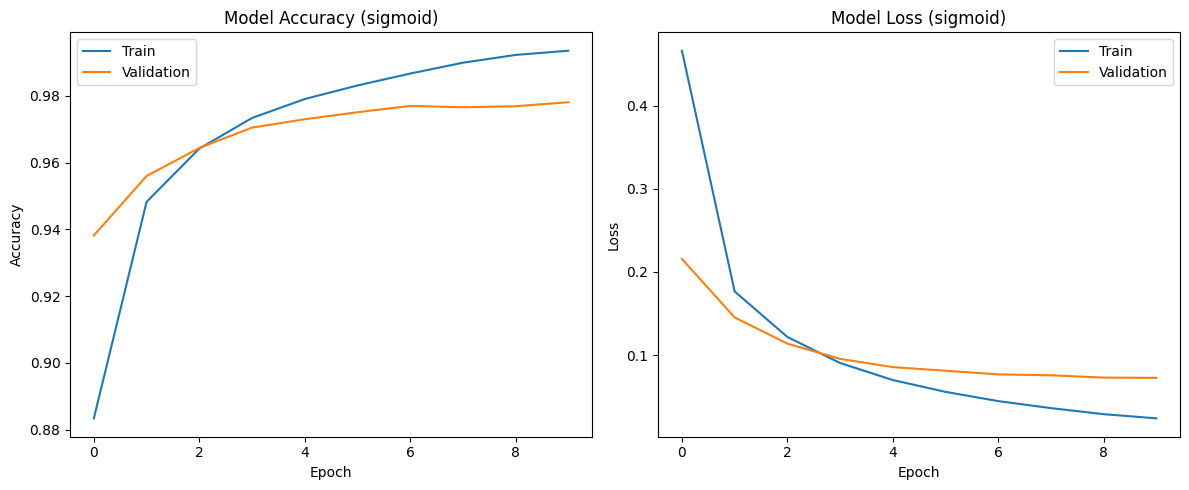

In [37]:
# Activation functions to test
activation_functions = ['tanh', 'sigmoid']

for activation in activation_functions:
    print(f"Training model with activation function: {activation}")

    # Create and train the model
    model = create_model_with_activation(activation)
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Model accuracy with activation {activation}: {accuracy:.4f}")

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()

Training model with activation function: tanh (No Scaling)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7570 - loss: 0.7796 - val_accuracy: 0.8661 - val_loss: 0.4279
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8665 - loss: 0.4277 - val_accuracy: 0.8778 - val_loss: 0.3845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8771 - loss: 0.3872 - val_accuracy: 0.8807 - val_loss: 0.3777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8843 - loss: 0.3607 - val_accuracy: 0.9057 - val_loss: 0.3059
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8995 - loss: 0.3184 - val_accuracy: 0.9016 - val_loss: 0.3144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8983 - loss: 0.3191 - val_accuracy: 0.9103 - val_loss: 0.2928
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9073 - loss: 0.2955 - val_accuracy: 0.9138 - val_loss: 0.2818
Epoch 8/10
1875/1875 ━━━━━━━━

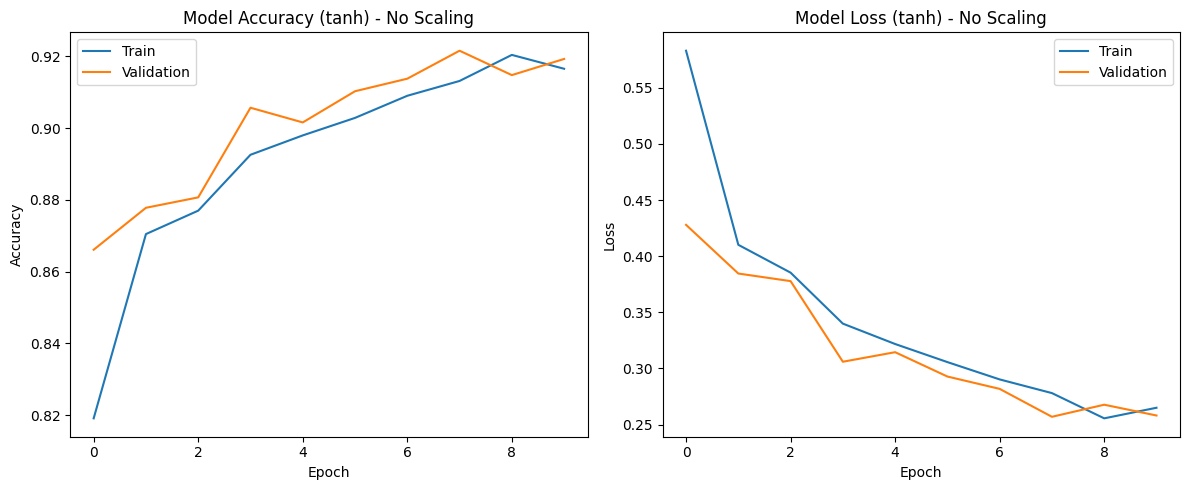

Training model with activation function: sigmoid (No Scaling)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7643 - loss: 0.9373 - val_accuracy: 0.9011 - val_loss: 0.3593
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8868 - loss: 0.3770 - val_accuracy: 0.8960 - val_loss: 0.3278
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9023 - loss: 0.3230 - val_accuracy: 0.9034 - val_loss: 0.2956
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9118 - loss: 0.2928 - val_accuracy: 0.9022 - val_loss: 0.3129
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9085 - loss: 0.3007 - val_accuracy: 0.9102 - val_loss: 0.2901
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9162 - loss: 0.2708 - val_accuracy: 0.9198 - val_loss: 0.2575
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9228 - loss: 0.2493 - val_accuracy: 0.9273 - val_loss: 0.2382
Epoch 8/10
1875/1875 ━━

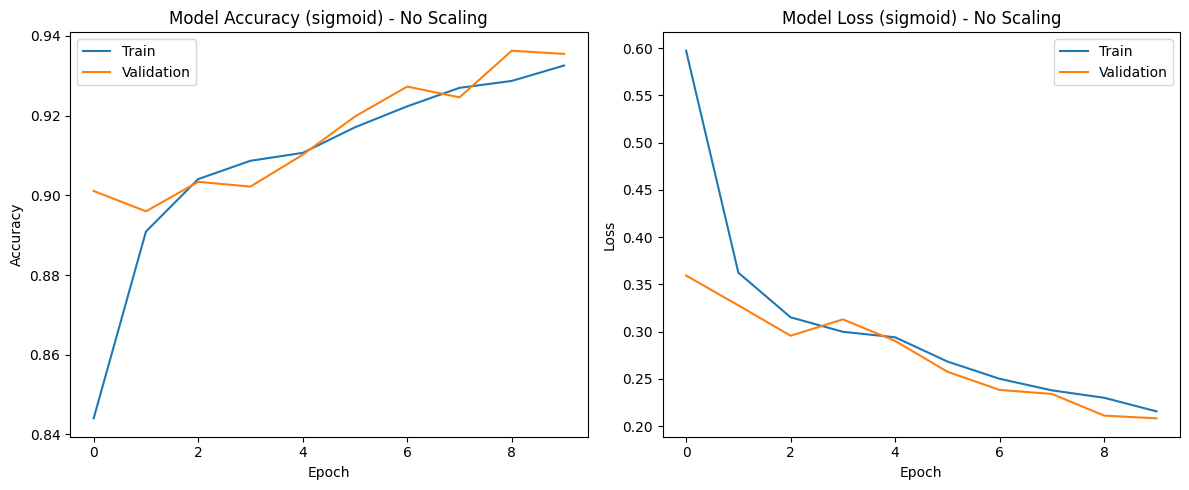

In [38]:
# Load the MNIST dataset without scaling
(x_train_no_scale, y_train_no_scale), (x_test_no_scale, y_test_no_scale) = mnist.load_data()

# One-hot encode the labels
y_train_no_scale = to_categorical(y_train_no_scale, 10)
y_test_no_scale = to_categorical(y_test_no_scale, 10)

# Train and evaluate models with no scaling and different activation functions
for activation in activation_functions:
    print(f"Training model with activation function: {activation} (No Scaling)")

    # Create and train the model
    model_no_scale = create_model_with_activation(activation)
    history_no_scale = model_no_scale.fit(x_train_no_scale, y_train_no_scale,
                                          epochs=10,
                                          batch_size=32,
                                          validation_data=(x_test_no_scale, y_test_no_scale))

    # Evaluate the model
    loss_no_scale, accuracy_no_scale = model_no_scale.evaluate(x_test_no_scale, y_test_no_scale)
    print(f"Model accuracy with activation {activation} (No Scaling): {accuracy_no_scale:.4f}")

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history_no_scale.history['accuracy'])
    plt.plot(history_no_scale.history['val_accuracy'])
    plt.title(f'Model Accuracy ({activation}) - No Scaling')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history_no_scale.history['loss'])
    plt.plot(history_no_scale.history['val_loss'])
    plt.title(f'Model Loss ({activation}) - No Scaling')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()

Changing Activation Functions:
different activation functions (tanh or sigmoid) impact the model’s accuracy and loss.
No Scaling:
We observed the effect of not normalizing the images on the model's performance.
These experiments will help you understand how different factors affect model training and evaluation.
Normalization typically helps models converge faster and can improve accuracy, so we see a noticeable difference when comparing with and without scaling.




